In [4]:
#Nayan Maharjan
#stdid = 362487

# Data Cleaning

import pandas as pd

# Load the dataset and read the data set
flights_data = pd.read_csv("Flights.csv")

# Display the first few rows of the dataset to understand its structure
print("Initial Data Preview:")
print(flights_data.head())

# Check the basic information about the dataset (data types, missing values, etc.)
print("\nDataset Information:")
print(flights_data.info())

# Check for missing values in the dataset
missing_values = flights_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Convert the 'Month' column to datetime format
# Assuming 'Month' is in the format like 'Sep-03' which means September 2003
flights_data['Month'] = pd.to_datetime(flights_data['Month'], format='%b-%y')

# Check the changes after converting 'Month' to datetime
print("\nData Preview After Converting 'Month' to Datetime:")
print(flights_data.head())

# Ensure that the 'Month' conversion was successful
print("\nDataset Information After Date Conversion:")
print(flights_data.info())


Initial Data Preview:
   _id   Month In_Out Australian_City International_City  \
0    1  Sep-03      I        Adelaide           Denpasar   
1    2  Sep-03      I        Adelaide          Hong Kong   
2    3  Sep-03      I        Adelaide       Kuala Lumpur   
3    4  Sep-03      I        Adelaide          Singapore   
4    5  Sep-03      I        Adelaide          Singapore   

                  Airline            Route     Port_Country Port_Region  \
0        Garuda Indonesia      DPS-ADL-MEL        Indonesia     SE Asia   
1  Cathay Pacific Airways      HKG-ADL-MEL  Hong Kong (SAR)     NE Asia   
2       Malaysia Airlines          KUL-ADL         Malaysia     SE Asia   
3          Qantas Airways  SIN-DRW-ADL-MEL        Singapore     SE Asia   
4          Qantas Airways  SIN-DRW-ADL-SYD        Singapore     SE Asia   

   Service_Country Service_Region  Stops  All_Flights  Max_Seats  Year  \
0        Indonesia        SE Asia      0           13       3809  2003   
1  Hong Kong (SAR)


Summary Statistics of Numerical Features:
                 _id                          Month          Stops  \
count  110055.000000                         110055  110055.000000   
mean    55028.000000  2013-03-08 19:15:00.564263168       0.162464   
min         1.000000            2003-09-01 00:00:00       0.000000   
25%     27514.500000            2009-03-01 00:00:00       0.000000   
50%     55028.000000            2013-03-01 00:00:00       0.000000   
75%     82541.500000            2017-04-01 00:00:00       0.000000   
max    110055.000000            2022-09-01 00:00:00       3.000000   
std     31770.286275                            NaN       0.388295   

         All_Flights      Max_Seats           Year      Month_num  
count  110055.000000  110055.000000  110055.000000  110055.000000  
mean       24.775367    6610.760910    2012.726573       6.511762  
min         0.000000       0.000000    2003.000000       1.000000  
25%        12.000000    2461.000000    2009.000000    

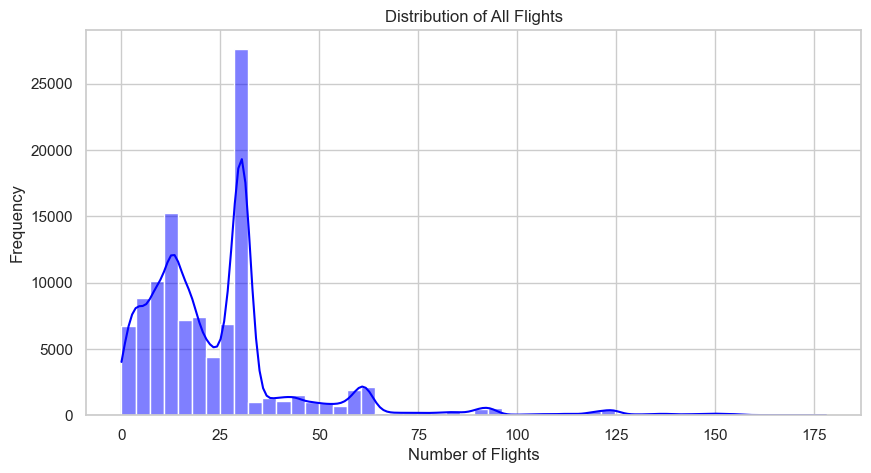

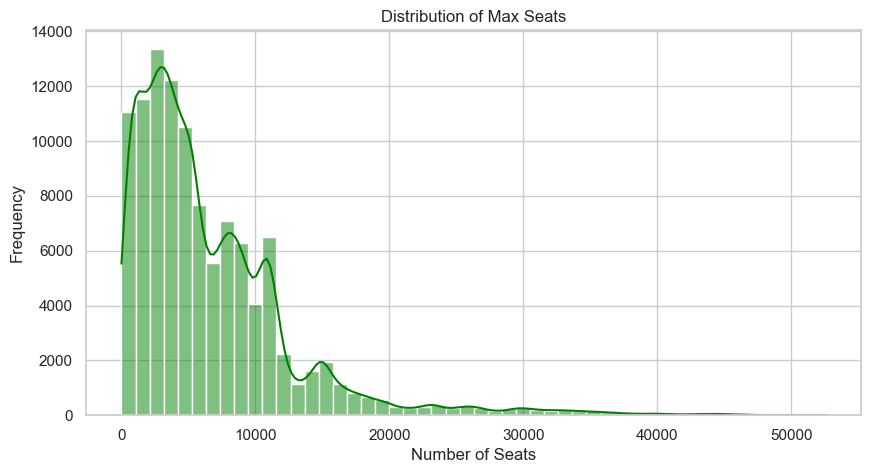

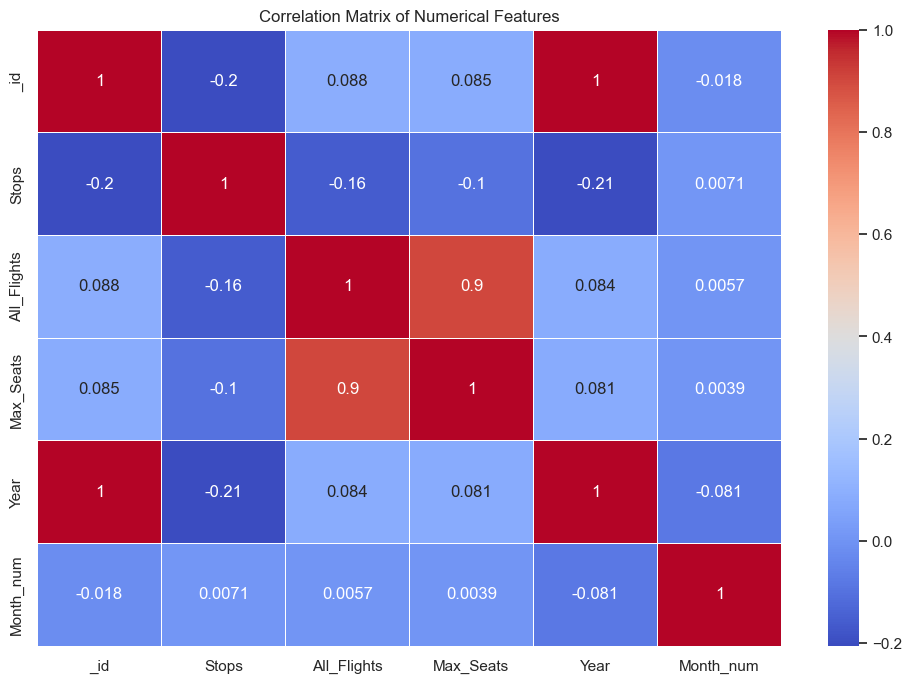

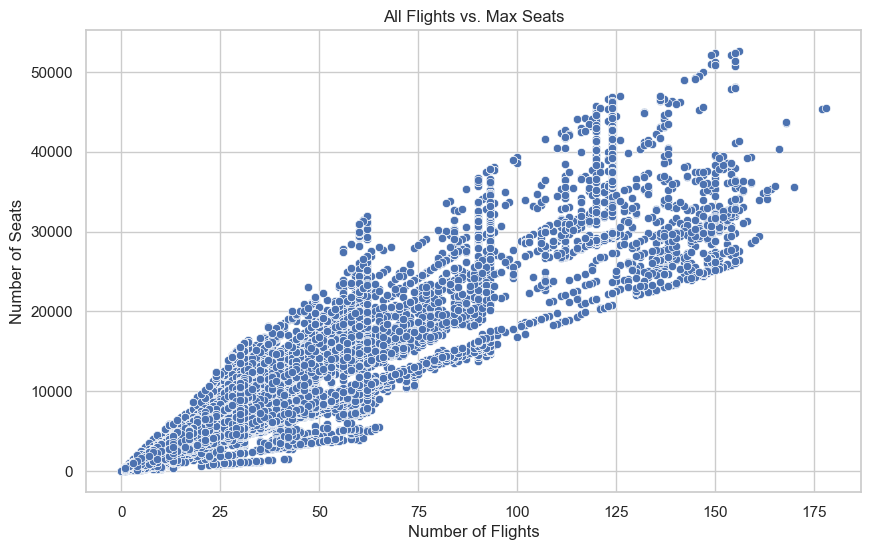

C:\Users\nayan\AppData\Local\Temp\ipykernel_1892\1279835634.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airlines.values, y=top_airlines.index, palette='viridis')


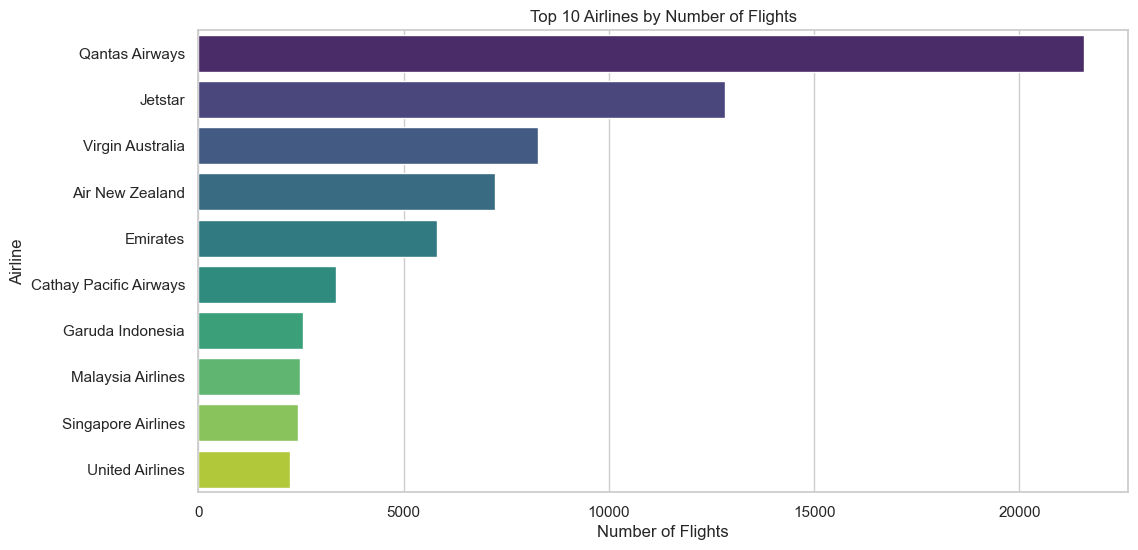

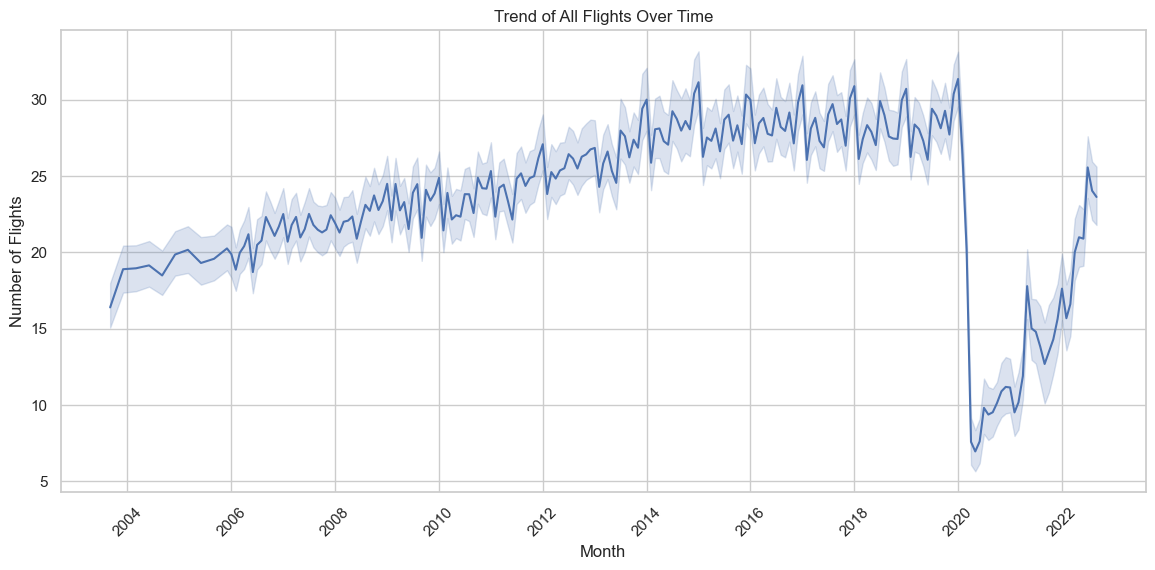

In [5]:
# Exploratory Data Analysis (EDA) - Adjusted for Correlation Matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="whitegrid")

# 1. Overview of Numerical Features
# Summary statistics of numerical features
print("\nSummary Statistics of Numerical Features:")
print(flights_data.describe())

# 2. Univariate Analysis: Distribution of 'All_Flights'
plt.figure(figsize=(10, 5))
sns.histplot(flights_data['All_Flights'], bins=50, kde=True, color='blue')
plt.title('Distribution of All Flights')
plt.xlabel('Number of Flights')
plt.ylabel('Frequency')
plt.show()

# 3. Univariate Analysis: Distribution of 'Max_Seats'
plt.figure(figsize=(10, 5))
sns.histplot(flights_data['Max_Seats'], bins=50, kde=True, color='green')
plt.title('Distribution of Max Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
plt.show()

# 4. Bivariate Analysis: Correlation Heatmap
# Select only numeric columns for the correlation matrix
numeric_cols = flights_data.select_dtypes(include=['float64', 'int64'])  # Filter numeric columns

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 5. Bivariate Analysis: Scatter Plot - 'All_Flights' vs 'Max_Seats'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='All_Flights', y='Max_Seats', data=flights_data)
plt.title('All Flights vs. Max Seats')
plt.xlabel('Number of Flights')
plt.ylabel('Number of Seats')
plt.show()

# 6. Analyzing Categorical Variables: Top 10 Airlines by Number of Flights
top_airlines = flights_data['Airline'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_airlines.values, y=top_airlines.index, palette='viridis')
plt.title('Top 10 Airlines by Number of Flights')
plt.xlabel('Number of Flights')
plt.ylabel('Airline')
plt.show()

# 7. Time Series Analysis: Trend of All Flights Over Time
# Assuming 'Month' has been converted to datetime during data cleaning
plt.figure(figsize=(14, 6))
sns.lineplot(x='Month', y='All_Flights', data=flights_data)
plt.title('Trend of All Flights Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()


In [6]:
# Feature Engineering

#  Route Popularity: Count of total flights for each unique route
flights_data['Route_Popularity'] = flights_data.groupby('Route')['Route'].transform('count')

# Seasonal Indicator: Map months to seasons (e.g., Summer, Autumn, Winter, Spring)
flights_data['Season'] = flights_data['Month'].dt.month.map({
    12: 'Summer', 1: 'Summer', 2: 'Summer',
    3: 'Autumn', 4: 'Autumn', 5: 'Autumn',
    6: 'Winter', 7: 'Winter', 8: 'Winter',
    9: 'Spring', 10: 'Spring', 11: 'Spring'
})

# Capacity Utilization Rate: Ratio of flights to the maximum seat capacity
flights_data['Capacity_Utilization_Rate'] = flights_data['All_Flights'] / flights_data['Max_Seats']

# Airline-Route Interaction: Combine 'Airline' and 'Route' to create a combined feature
flights_data['Airline_Route_Combo'] = flights_data['Airline'] + '_' + flights_data['Route']

# Check the updated dataset with new features
print("Updated Data Preview with New Features:")
print(flights_data.head())


Updated Data Preview with New Features:
   _id      Month In_Out Australian_City International_City  \
0    1 2003-09-01      I        Adelaide           Denpasar   
1    2 2003-09-01      I        Adelaide          Hong Kong   
2    3 2003-09-01      I        Adelaide       Kuala Lumpur   
3    4 2003-09-01      I        Adelaide          Singapore   
4    5 2003-09-01      I        Adelaide          Singapore   

                  Airline            Route     Port_Country Port_Region  \
0        Garuda Indonesia      DPS-ADL-MEL        Indonesia     SE Asia   
1  Cathay Pacific Airways      HKG-ADL-MEL  Hong Kong (SAR)     NE Asia   
2       Malaysia Airlines          KUL-ADL         Malaysia     SE Asia   
3          Qantas Airways  SIN-DRW-ADL-MEL        Singapore     SE Asia   
4          Qantas Airways  SIN-DRW-ADL-SYD        Singapore     SE Asia   

   Service_Country Service_Region  Stops  All_Flights  Max_Seats  Year  \
0        Indonesia        SE Asia      0           13   

In [7]:

import pandas as pd
from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# Convert Datetime Columns and Drop Redundant Date Information
if 'Month' in flights_data.columns:
    flights_data['Month'] = pd.to_datetime(flights_data['Month'], format='%b-%y')
    flights_data['Month_Year'] = flights_data['Month'].dt.year
    flights_data['Month_Num'] = flights_data['Month'].dt.month
    flights_data.drop(columns=['Month'], inplace=True)

# Drop all columns except the ones needed for encoding and normalization
columns_to_keep = ['Airline', 'Route', 'Airline_Route_Combo', 'In_Out', 'Season', 
                   'Stops', 'Max_Seats', 'Capacity_Utilization_Rate', 'Month_Num', 'Month_Year', 'All_Flights']
flights_data = flights_data[columns_to_keep]

# Apply Encoding to Categorical Variables
# High-cardinality features for Binary Encoding
high_cardinality_vars = ['Airline', 'Route', 'Airline_Route_Combo']

# Apply Binary Encoding to high-cardinality categorical variables
binary_encoder = BinaryEncoder(cols=high_cardinality_vars, drop_invariant=True)
flights_data_encoded = binary_encoder.fit_transform(flights_data)

# Low-cardinality features for One-Hot Encoding
low_cardinality_vars = ['In_Out', 'Season']

# Apply One-Hot Encoding to low-cardinality categorical variables
flights_data_encoded = pd.get_dummies(flights_data_encoded, columns=low_cardinality_vars, drop_first=True)

# Print the columns to see the encoded column names
print("Columns after encoding:")
print(flights_data_encoded.columns)

# Standardize Numerical Features
numerical_features = ['Stops', 'Max_Seats', 'Capacity_Utilization_Rate', 'Month_Num', 'Month_Year']

# Replace infinite values with NaN and fill them if necessary
flights_data_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
flights_data_encoded[numerical_features] = flights_data_encoded[numerical_features].fillna(flights_data_encoded[numerical_features].mean())

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to numerical features
flights_data_encoded[numerical_features] = scaler.fit_transform(flights_data_encoded[numerical_features])

# Define Features and Target Variable
# Assuming 'All_Flights' is the target variable
X = flights_data_encoded.drop(columns=['All_Flights'])
y = flights_data_encoded['All_Flights']

# Manually select features to be used based on actual column names after encoding
# Get the list of columns after encoding
encoded_columns = list(X.columns)

# Define the selected features manually
# Include numerical features directly
selected_features = numerical_features.copy()

# Include encoded feature columns
selected_features += [col for col in encoded_columns if col.startswith('Airline') or 
                                               col.startswith('Route') or 
                                               col.startswith('Airline_Route_Combo') or 
                                               col.startswith('In_Out') or 
                                               col.startswith('Season')]

# Ensure that the selected features are present in the dataset
X = X[selected_features]

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Final check of data shapes
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

# Train and Evaluate Multiple Models with Overfitting Prevention

# 1. Linear Regression with Ridge Regularization
lr = Ridge(alpha=1.0)  # L2 regularization parameter
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression (Ridge) Evaluation Metrics:")
print(f"MAE: {mae_lr:.4f}, MSE: {mse_lr:.4f}, R²: {r2_lr:.4f}")

# 2. Random Forest Regressor with Depth Limitation
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Evaluation Metrics:")
print(f"MAE: {mae_rf:.4f}, MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")

# 3. Decision Tree Regressor with Pruning
dt = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Regressor Evaluation Metrics:")
print(f"MAE: {mae_dt:.4f}, MSE: {mse_dt:.4f}, R²: {r2_dt:.4f}")

# 4. XGBoost with Hyperparameter Tuning and Cross-Validation
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV with XGBoost
grid_search_xgb = GridSearchCV(
    XGBRegressor(random_state=42, eval_metric='rmse'),
    param_grid_xgb,
    cv=5,
    scoring='neg_mean_squared_error'
)

# Fit the GridSearchCV to find the best parameters
grid_search_xgb.fit(X_train, y_train)

# Extract the best estimator from the grid search
best_xgb = grid_search_xgb.best_estimator_

# Print the best parameters found by GridSearchCV
print(f"\nBest parameters for XGBoost: {grid_search_xgb.best_params_}")

# Evaluate the best model on the test set
y_pred_best_xgb = best_xgb.predict(X_test)

# Calculate evaluation metrics for the best XGBoost model
mae_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_xgb = r2_score(y_test, y_pred_best_xgb)

print("\nBest XGBoost Regressor Evaluation Metrics:")
print(f"MAE: {mae_xgb:.4f}, MSE: {mse_xgb:.4f}, R²: {r2_xgb:.4f}")


Columns after encoding:
Index(['Airline_0', 'Airline_1', 'Airline_2', 'Airline_3', 'Airline_4',
       'Airline_5', 'Airline_6', 'Route_0', 'Route_1', 'Route_2', 'Route_3',
       'Route_4', 'Route_5', 'Route_6', 'Route_7', 'Route_8', 'Route_9',
       'Route_10', 'Airline_Route_Combo_0', 'Airline_Route_Combo_1',
       'Airline_Route_Combo_2', 'Airline_Route_Combo_3',
       'Airline_Route_Combo_4', 'Airline_Route_Combo_5',
       'Airline_Route_Combo_6', 'Airline_Route_Combo_7',
       'Airline_Route_Combo_8', 'Airline_Route_Combo_9',
       'Airline_Route_Combo_10', 'Stops', 'Max_Seats',
       'Capacity_Utilization_Rate', 'Month_Num', 'Month_Year', 'All_Flights',
       'In_Out_O', 'Season_Spring', 'Season_Summer', 'Season_Winter'],
      dtype='object')
Training data shape: (77038, 38), Testing data shape: (33017, 38)

Linear Regression (Ridge) Evaluation Metrics:
MAE: 4.5179, MSE: 56.4038, R²: 0.8744

Random Forest Regressor Evaluation Metrics:
MAE: 0.4437, MSE: 0.5480, R²: 0.998